# DS 5. Grident Descent

> "작성완료"

- toc: true
- branch: master
- badges: true
- comments: true
- [python, Data Science]

---
# Data Science
- lenture: Data Science_4-2nd week of lectures.
- lenture date: 2022-03-28
- lecturer: Guebin choi
- study date: 2022-03-29, 2022-03-30
- author: Kione kim
---

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow.experimental.numpy as tnp

In [4]:
tnp.experimental_enable_numpy_behavior()

## 경사하강법 - 최적화문제

`-` $loss= (\frac{1}{2}\beta -1)^2$를 최소로 하는 $\beta$를 컴퓨터를 통해 구하는 문제를 생각해보자. (답은 당연히 $\beta=2$)

### 방법 2: Grid Descent

#### 알고리즘

(1) 임의의 초기값을 선정하고 loss를 계산한다. 
 - $\beta=10 \to loss(10)=(10/2-1)^2=16.0$

In [4]:
(10/2-1)**2

16.0

(2) 임의의 초기값에서 좌우로 약간씩 이동해보고 loss를 계산한다.
 - 왼쪽으로 이동: $\beta=10.01,\quad loss(10.01)=16.040025$
 - 오른쪽으로 이동: $\beta=9.99, \quad loss(9.99)=15.960025$ 

In [5]:
(10.01 /2 -1)**2

16.040025

In [6]:
(9.99 /2 -1)**2

15.960025000000002

(3) (2)의 결과를 보고 어느쪽으로 이동하는것이 유리한지 따져보고 `유리한 방향으로` 이동한다. 

`유리한 방향:` 절대값이 작은 쪽
- $\beta=9.99$ 로 이동 

(4) (2)-(3) 의 과정을 반복한다. **왼쪽/오른쪽 모두 가봐도 유리한 지점이 없다면 알고리즘을 멈춘다.**

#### 알고리즘 감상 

`-` 알고리즘이 멈추는 지점은 $\beta=2$이다. $\beta=2$일 때 loss가 0이 되므로 왼쪽으로 가도, 오른쪽으로 가도 현재 loss보다 크기 때문이다.

`-` 이 알고리즘은 grid search의 단점을 극복함! 
- $loss=(x\beta-y)^2$의 꼴에서 $[-10,10]$ 이외의 지점에 해가 존재하여도 적절하게 해를 찾을 것.
- 또한 비효율적으로 $\beta=2$ 이후에도 탐색을 반복하지 않음. 

#### 알고리즘해석 

`(1)의 의미:` 임의의 초기값에서의 loss 계산(미분)   
`(2)의 의미:` 미분을 하라는 뜻    
`(3)의 의미:` update    
`(4)의 의미:` 반복

#### 미분계수의 의미&수식화

`-` 미분계수의 의미

- 미분계수가 양수이다 -> 왼쪽으로 이동해야 = 마이너스 0.01 
- 미분계수가 음수이다 -> 오른쪽으로 이동 = 플러스 0.01 

`-` 수식화

$$\beta_{next} = \begin{cases} \beta_{old} - 0.01 & loss'(\beta_{old})>0 \\ \beta_{old} + 0.01 & loss'(\beta_{old})<0  \end{cases}$$

- 언제나 0.01씩 이동하는 것이 맞을까?

- loss 값의 절대값이 크면(찾아야 할 베타값으로 부터 거리가 먼 값이라면) 0.01씩 이동해서 언제 다 이동하지?

- 절대값이 크면(찾아야 하는 베타값으로부터 거리가 먼 경우) 이동을 많이 하고 절대값이 작으면(찾아야 하는 베타값으로부터 거리가 가까운 경우) 이동을 적게 하는 알고리즘으로 개선하고싶음!

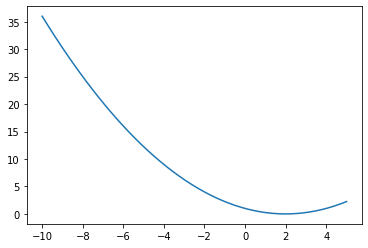

In [7]:
beta = np.linspace(-10,5)
plt.plot(beta,(beta/2-1)**2)

`-` 위 그림에서 $\beta=-10$ 일 경우의 접선의 기울기는 $-6$이고 $\beta=-4$ 일때 접선의 기울기는 $-3$이다. 

$\because loss = (0.5\beta-1)^2 \to loss' = 0.5\beta-1$

- $\beta=-10$에서 0.01만큼 이동했다면 $\beta=-4$에서 0.005만큼 이동해야 한다.

`-` 개선한 알고리즘의 수식화

$$\beta_{next} \leftarrow \beta_{old} -\alpha \left[\frac{\partial}{\partial \beta} loss(\beta)\right]_{\beta=\beta_{old}}$$

- 전의 수식이랑 좀 달라보이지만 $\beta_{old}$를 이동시켜 $\beta_{next}$를 만든다는 개념은 동일! 
- $\alpha>0$
- $\alpha$의 의미: 한 번 업데이트할때 움직이는 보폭(걸음걸이), 절대값이 크면 큰 보폭으로 걷고 절대값이 작으면 작은 보폭으로 걷는다!
- $\alpha=\frac{0.01}{6}$ 로 만약 설정하면 $\beta=-10$일때 오른쪽으로 $0.01$움직임 

`개선한 알고리즘을 이용한 풀이`

`-` with문

In [8]:
beta= tf.Variable(-10.0)

In [9]:
with tf.GradientTape(persistent=True) as mytape:
    loss= (beta/2-1)**2

In [10]:
mytape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

- $beta=-10$일 때 기울기(미분계수)가 $-6$이 나옴

In [11]:
beta= tf.Variable(-4.0)

In [12]:
with tf.GradientTape(persistent=True) as mytape:
    loss= (beta/2-1)**2

In [13]:
mytape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-3.0>

- $beta=-4$일 떄 기울기(미분계수)가 $-3$이 나옴

**iter1:** $beta=-10$ 출발해서 $0.01$ 이동!

In [14]:
beta= tf.Variable(-10.0)

In [15]:
with tf.GradientTape(persistent=True) as mytape:
    loss= (beta/2-1)**2

In [16]:
mytape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

In [17]:
alpha=0.01/6

`-` -$α$이기 떄문에 `beta.assign_sub`를 이용!

In [18]:
beta.assign_sub(alpha*mytape.gradient(loss,beta))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

- 10에서 이동하기 시작하여 -9.99가 되었음

**iter2:** $beta=-9.99$ 출발해서 다시 $0.01$ 이동!

In [19]:
beta= tf.Variable(-9.99)

In [20]:
with tf.GradientTape(persistent=True) as mytape:
    loss= (beta/2-1)**2

In [21]:
beta.assign_sub(alpha*mytape.gradient(loss,beta))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.980008>

- $-9.99$에서 $0.01$이동하여 $-9.98$이 되었음

**iter3:** 반복!

`-` for문

In [22]:
beta= tf.Variable(-10.0)
for k in range(10000):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2
    beta.assign_sub(alpha*mytape.gradient(loss,beta))

In [23]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

- $10000$번 반복해보았더니 $beta$가 이론적인 값인 $2$에 가까운 값($1.997$)이 나왔음!

`-` $10000$번 반복이 아닌 $100$번 정도 반복해도 이론적인 값인 $2$에 가깝게 나올까?

In [24]:
beta= tf.Variable(-10.0)
for k in range(100):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2
    beta.assign_sub(alpha*mytape.gradient(loss,beta))

In [25]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.040152>

- $2$와 거리가 먼 $-9$ 값이 나옴

`-` 그렇다면 $1000$번은 어떻까?

In [26]:
beta= tf.Variable(-10.0)
for k in range(1000):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2
    beta.assign_sub(alpha*mytape.gradient(loss,beta))

In [27]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-3.2133684>

- 아까보단 가까운 값($-3.2133$)이 나오긴 했음!

- 그런데 $1000$번을 반복해도 나오지 않은 건 좀...!

- 이는 설정한 alpha 값이 작기 때문! 즉 보폭이 작으니 많이 걸어야 하는 꼴..!

`cf` `tf.Variable`의 진가!
- 왜 써야하는지 의문이 들었던 `tf.Variable()`가 점점 이해되기 시작함
- 안 그래도 제외된 기능이 많은데 assign_sub, assign_add와 같은 기능이 있는 이유 -> 이것이 tf.Variable()의 목적이기 때문!! 
- tf.Variable()에 다른 기능들이 없는 이유는 tf.Variable()의 목적을 이루는데 필요하지 않은 기능들이기 때문! 
- tf.Gradient(persistent=False)가 default인 이유: 미분계산은 한 번하고 버리기 때문 !

#### 학습률

`-` 목표: 아래의 학습과정을 시각화해보자. 

In [28]:
beta = tf.Variable(-10.0) 
alpha=0.01/6 

for k in range(100): 
    with tf.GradientTape(persistent=True) as tape: 
        loss = (beta/2-1)**2 
    beta.assign_sub(alpha*tape.gradient(loss,beta))

beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.040152>

##### **시각화 예비학습**

`-` 설정

In [5]:
from matplotlib import animation 

In [6]:
plt.rcParams["animation.html"]="jshtml"

`-` 도화지(fig) & 네모틀(axes)

In [ ]:
fig = plt.figure() # plt.figure()는 그림 물체를 만드는 함수이고 그림 물체의 이름을 fig로 지정

<Figure size 432x288 with 0 Axes>

In [32]:
type(fig)

matplotlib.figure.Figure

- Figure라는 타입을 갖는 물체임!

In [ ]:
ax = fig.add_subplot() # fig.add_subplot는 네모틀(물체)을 만드는 함수이고 이를 ax(es)로 지정

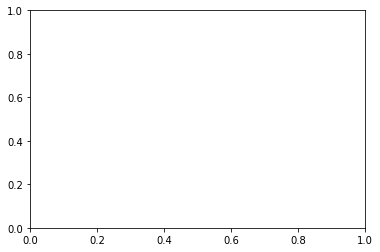

In [34]:
fig

`-` 도화지와 네모틀는 포함관계에 있음. 

In [35]:
fig.axes

[<AxesSubplot:>]

In [36]:
fig.axes[0] # 원소가 추출됨

<AxesSubplot:>

In [37]:
id(fig.axes[0])

1570293991936

In [38]:
id(ax)

1570293991936

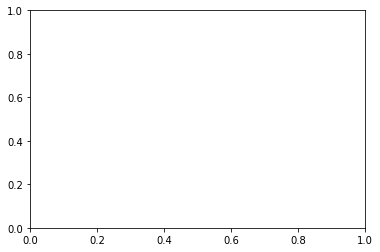

In [39]:
fig

- 따라서 도화지를 출력하면 네모틀도 자동으로 출력됨

`-` 네모틀(ax)의 특수기능(=메소드)중에는 plot이 있음. 이것은 또 어떤 오브젝트를 생성함 

In [ ]:
point = ax.plot([1,2,3],[3,4,5],'or') 
point

In [41]:
point[0]

In [ ]:
point=point[0]
point

- 이는 다음 코드와 같다(튜플언패킹)

In [ ]:
point, = ax.plot([1,2,3],[3,4,5],'or')
point

---

In [44]:
(1,)

(1,)

In [45]:
1+2

3

In [46]:
(1,) + (2,)

(1, 2)

In [47]:
a,b = [1,2]

In [48]:
a

1

In [49]:
b

2

In [50]:
a, = [1]

In [51]:
a

1

---

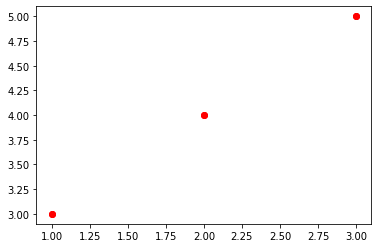

In [52]:
fig

- point는 오브젝트 ->  x,y data를 변경해보자. 

In [53]:
point.get_xdata()

array([1, 2, 3])

- x data가 출력됨

In [54]:
point.get_ydata()

array([3, 4, 5])

- y data가 출력됨

In [55]:
point.set_ydata([4,4,4])

- y data가 변경됨!

In [56]:
point.get_ydata()

[4, 4, 4]

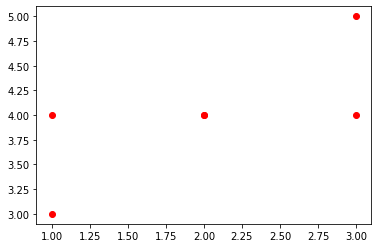

In [57]:
fig

- 왜 기존 데이터가 사라지지 않았지..?

`-` 애니매이션

In [ ]:
def animate(i): 
    if i%2 == 0:
        point.set_ydata([3,4,5])
    else: 
        point.set_ydata([4,4,4])

In [ ]:
ani=animation.FuncAnimation(fig,animate,frames=30)
ani

시각화 예비학습 끝
 
---

##### 학습과정 구현!

`-` 한 번에 구현하기 힘드니 간단한 그림을 먼저 구현해보자!

`-` 곡선위의 세 점의 변화를 시각화해보자

In [60]:
beta_lst=[-10.0,-9.0,-8.0]
loss_lst=[(-10.0/2 -1)**2, (-9.0/2 -1)**2, (-8.0/2 -1)**2]

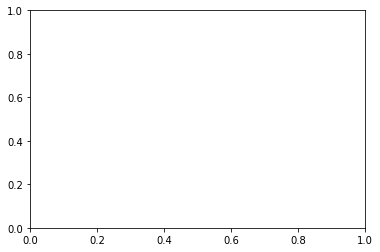

In [ ]:
fig=plt.figure()
ax=fig.add_subplot()

`-` 곡선그리기

In [62]:
_beta= np.linspace(-15,19)
ax.plot(_beta,(_beta/2 -1)**2)

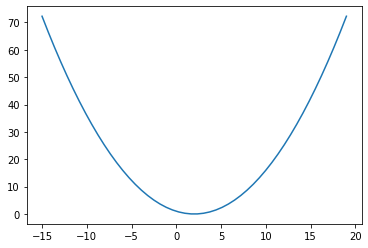

In [63]:
fig

`-` 점을 찍기

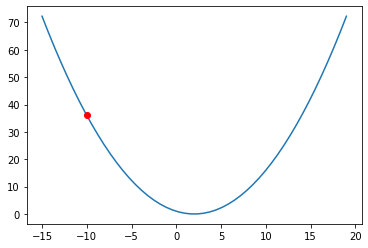

In [64]:
ax.plot(beta_lst[0],loss_lst[0],'ro')
fig

`-` 어떻게 애니메이션이 동작할지 정의하기

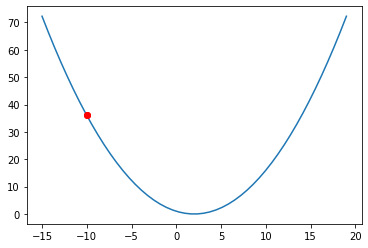

In [65]:
point, = ax.plot(beta_lst[0], loss_lst[0], 'ro')
fig

In [66]:
def animate(i):
    point.set_xdata(beta_lst[:(i+1)])
    point.set_ydata(loss_lst[:(i+1)])

In [67]:
ani=animation.FuncAnimation(fig,animate,frames=3) 
ani

``` python
- 이제 이 과정을 학습해보자 
beta = tf.Variable(-10.0) 
alpha=0.01/6 

for k in range(100): 
    with tf.GradientTape(persistent=True) as tape: 
        loss = (beta/2-1)**2 
    beta.assign_sub(alpha*tape.gradient(loss,beta))

beta
```

`-` 위 과정에 대한 애니메이션: 학습과정기록

`-` 비어있는 리스트 

In [100]:
beta_lst=[]
loss_lst=[]

`-` beta & alpha 선언

In [101]:
beta = tf.Variable(-10.0)
alpha = 0.01/6

`-` beta 넘파이화

In [102]:
beta.numpy()

-10.0

`-` for문에 쓰일 beta, loss 변경값

In [103]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2 -1)**2)

In [104]:
beta_lst

[-10.0]

In [105]:
loss_lst

[36.0]

`-` for문: 100번 반복

In [106]:
for k in range(100):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2 # 로스 식
    beta.assign_sub(alpha*mytape.gradient(loss,beta)) # 베타값 변경
    beta_lst.append(beta.numpy()) # 변경된 베타값 넘파이화한 후 베타 리스트에 저장
    loss_lst.append((beta.numpy()/2 -1)**2) # 변경된 베타값에 대한 로스값 넘파이화 후 로스 리스트에 저장

In [107]:
beta_lst[:20]

[-10.0,
 -9.99,
 -9.980008,
 -9.970025,
 -9.96005,
 -9.950083,
 -9.9401245,
 -9.930175,
 -9.920233,
 -9.910299,
 -9.900374,
 -9.890457,
 -9.8805485,
 -9.870648,
 -9.860756,
 -9.850872,
 -9.840997,
 -9.831129,
 -9.82127,
 -9.811419]

In [108]:
loss_lst[:20]

[36.0,
 35.94002362785341,
 35.88014867059451,
 35.82037499958483,
 35.76069678330009,
 35.701119605823806,
 35.64164333883673,
 35.58226785413012,
 35.5229873395956,
 35.463807360728424,
 35.40472778963908,
 35.34574282873655,
 35.28685802961354,
 35.22807326469979,
 35.16938275088614,
 35.11079202589826,
 35.052300962485106,
 34.99390379198394,
 34.935606038288824,
 34.87740194234448]

- 비어있던 베타리스트, 로스리스트에 값이 저장되어 있음

`-` 애니메이션

In [1]:
fig= plt.figure() # fig 선언
ax= fig.add_subplot()

NameError: name 'plt' is not defined

In [116]:
_beta= np.linspace(-15,19) # 애니메이션에 쓰일 곡선 그리기
ax.plot(_beta,(_beta/2 -1)**2)

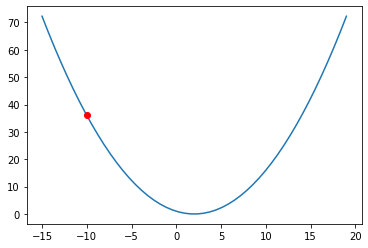

In [117]:
point, = ax.plot(beta_lst[0], loss_lst[0], 'ro') # fig에 애니메이션에서 움직일 점 찍기
fig

In [118]:
ani=animation.FuncAnimation(fig,animate,frames=100)
ani

- 넘 느리다..! 학습율을 높여보자!

`-` $α$가 $0.1$ 이면 어떨까?

In [120]:
beta_lst=[]
loss_lst=[]

In [121]:
beta = tf.Variable(-10.0)
alpha = 0.1

In [122]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2 -1)**2)

In [123]:
for k in range(100):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2 # 로스 식
    beta.assign_sub(alpha*mytape.gradient(loss,beta)) # 베타값 변경
    beta_lst.append(beta.numpy()) # 변경된 베타값 넘파이화한 후 베타 리스트에 저장
    loss_lst.append((beta.numpy()/2 -1)**2) # 변경된 베타값에 대한 로스값 넘파이화 후 로스 리스트에 저장

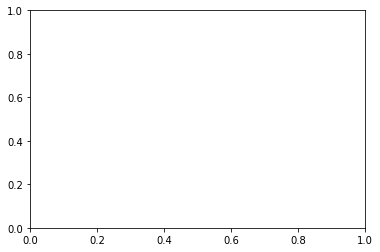

In [124]:
fig= plt.figure() # fig 선언
ax= fig.add_subplot()

In [125]:
_beta= np.linspace(-15,19) # 애니메이션에 쓰일 곡선 그리기
ax.plot(_beta,(_beta/2 -1)**2)

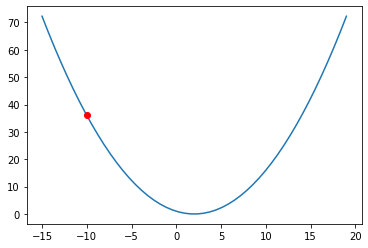

In [126]:
point, = ax.plot(beta_lst[0], loss_lst[0], 'ro') # fig에 애니메이션에서 움직일 점 찍기
fig

In [127]:
ani=animation.FuncAnimation(fig,animate,frames=100)
ani

- 아까보다 훨 나음! 
- 더 크게 하면 어떻게 될까?

`-` 이전보다 α를 훨씬키워 3.0 정도가 되면 어떻게 될까?

In [146]:
beta_lst=[]
loss_lst=[]

In [147]:
beta = tf.Variable(-10.0)
alpha = 3.9

In [148]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2 -1)**2)

In [149]:
for k in range(100):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2 # 로스 식
    beta.assign_sub(alpha*mytape.gradient(loss,beta)) # 베타값 변경
    beta_lst.append(beta.numpy()) # 변경된 베타값 넘파이화한 후 베타 리스트에 저장
    loss_lst.append((beta.numpy()/2 -1)**2) # 변경된 베타값에 대한 로스값 넘파이화 후 로스 리스트에 저장

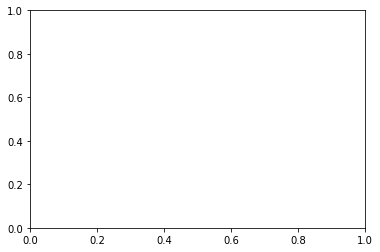

In [150]:
fig= plt.figure() # fig 선언
ax= fig.add_subplot()

In [151]:
_beta= np.linspace(-15,19) # 애니메이션에 쓰일 곡선 그리기
ax.plot(_beta,(_beta/2 -1)**2)

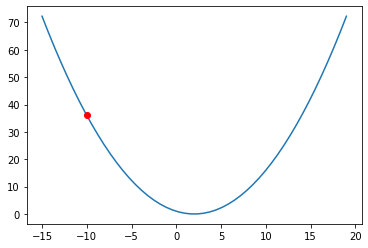

In [152]:
point, = ax.plot(beta_lst[0], loss_lst[0], 'ro') # fig에 애니메이션에서 움직일 점 찍기
fig

In [153]:
ani=animation.FuncAnimation(fig,animate,frames=100)
ani

- α가 너무 커 한 번에 반대 방향으로 이동했음
- 이 학습율 같은 경우는 비효율적이긴 하지만 최적의 베타값을 찾았으나, 이는 운이 좋은 경우임 !
- 다음 더 큰 α로 학습해보자!

`-` α가 4.05 때 학습

In [156]:
beta_lst=[]
loss_lst=[]

In [157]:
beta = tf.Variable(-10.0)
alpha = 4.05

In [158]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2 -1)**2)

In [159]:
for k in range(100):
    with tf.GradientTape() as mytape:
        loss=(beta/2 -1)**2 # 로스 식
    beta.assign_sub(alpha*mytape.gradient(loss,beta)) # 베타값 변경
    beta_lst.append(beta.numpy()) # 변경된 베타값 넘파이화한 후 베타 리스트에 저장
    loss_lst.append((beta.numpy()/2 -1)**2) # 변경된 베타값에 대한 로스값 넘파이화 후 로스 리스트에 저장

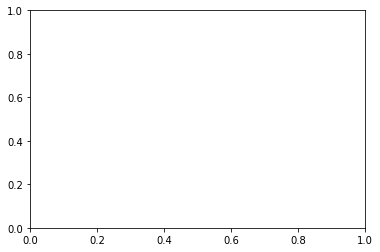

In [160]:
fig= plt.figure() # fig 선언
ax= fig.add_subplot()

In [161]:
_beta= np.linspace(-15,19) # 애니메이션에 쓰일 곡선 그리기
ax.plot(_beta,(_beta/2 -1)**2)

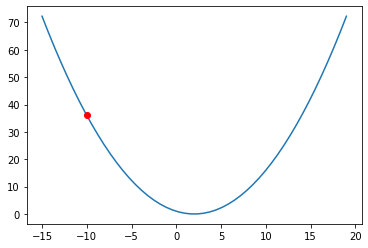

In [162]:
point, = ax.plot(beta_lst[0], loss_lst[0], 'ro') # fig에 애니메이션에서 움직일 점 찍기
fig

In [163]:
ani=animation.FuncAnimation(fig,animate,frames=100)
ani

- α가 너무 커 기울기의 절대값이 더 커지는 현상이 발생함! 
- 학습율이 너무 크면 문제가 생긴다

#### 추가학습
경사하강법을 이용하여 $y=(x-1)^2$의 최소값을 구하고 이를 애니메이션으로 시각화하라. (100번정도에 수렴하도록 적당한 학습률을 설정할것)  

In [325]:
beta_lst=[]
loss_lst=[]

In [326]:
beta = tf.Variable(5.0) # 반드시 소수형태로 표현!
alpha = 0.025

In [327]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()-1)**2)

In [328]:
for k in range(100):
    with tf.GradientTape() as mytape:
        loss=(beta-1)**2 # 로스 식
    beta.assign_sub(alpha*mytape.gradient(loss,beta)) # 베타값 변경
    beta_lst.append(beta.numpy()) # 변경된 베타값 넘파이화한 후 베타 리스트에 저장
    loss_lst.append((beta.numpy()-1)**2) # 변경된 베타값에 대한 로스값 넘파이화 후 로스 리스트에 저장

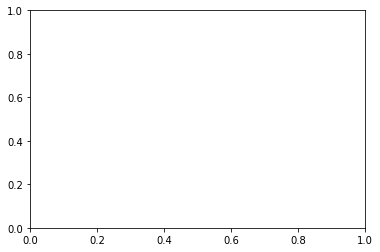

In [329]:
fig= plt.figure() # fig 선언
ax= fig.add_subplot()

In [330]:
_beta= np.linspace(-4,6) # 애니메이션에 쓰일 곡선 그리기
ax.plot(_beta,(_beta-1)**2)

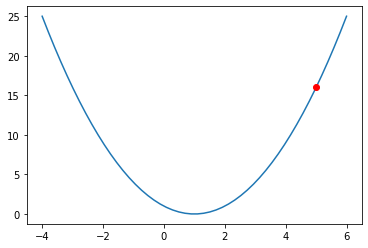

In [331]:
point, = ax.plot(beta_lst[0], loss_lst[0], 'ro') # fig에 애니메이션에서 움직일 점 찍기
fig

In [332]:
ani=animation.FuncAnimation(fig,animate,frames=100)
ani

- $β$가 $5$에서 출발하여 $α=0.025$로 하여 $β=1$에 수렴
- $x=1$이다.

In [334]:
beta_lst[100]

1.0236822